# Data Understanding and Analysis

## 0. Importing libraries and data loading 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import re
sns.set(style="whitegrid")

In [6]:
df = pd.read_csv("./ObesityDataset.csv")

## 1. Data overview

In [7]:
df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   family_history_with_overweight  2111 non-null   object 
 3   FAVC                            2111 non-null   object 
 4   FCVC                            2111 non-null   float64
 5   NCP                             2111 non-null   float64
 6   CAEC                            2111 non-null   object 
 7   SMOKE                           2111 non-null   object 
 8   CH2O                            2111 non-null   float64
 9   SCC                             2111 non-null   object 
 10  FAF                             2111 non-null   float64
 11  TUE                             2111 non-null   float64
 12  CALC                            21

In [16]:
df.describe()

,Age,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,3.000000,4.000000,3.000000,3.000000,2.000000


## 2. Distribution Checking

In [9]:
def analyze_value_distribution(col_name):
    print(f"\n=== Value Distribution for column: {col_name} ===")
    
    value_counts = df[col_name].value_counts(dropna=False)
    print("Number of unique values:", df[col_name].nunique())
    print("Top 10 most frequent values:\n", value_counts.head(10))

In [12]:
for col in df.columns:
    analyze_value_distribution(col)


=== Value Distribution for column: Gender ===
Number of unique values: 2
Top 10 most frequent values:
 Gender
Male      1068
Female    1043
Name: count, dtype: int64

=== Value Distribution for column: Age ===
Number of unique values: 1402
Top 10 most frequent values:
 Age
18.0    128
26.0    101
21.0     96
23.0     89
19.0     59
20.0     48
22.0     39
17.0     30
24.0     18
25.0     16
Name: count, dtype: int64

=== Value Distribution for column: family_history_with_overweight ===
Number of unique values: 2
Top 10 most frequent values:
 family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

=== Value Distribution for column: FAVC ===
Number of unique values: 2
Top 10 most frequent values:
 FAVC
yes    1866
no      245
Name: count, dtype: int64

=== Value Distribution for column: FCVC ===
Number of unique values: 810
Top 10 most frequent values:
 FCVC
3.000000    652
2.000000    600
1.000000     33
2.971574      2
2.630137      2
2.967300      2
2.758394

## 3. Missing values checking

There are no missing values inside the data

In [13]:
def missing_percentage(col_name):
    total = len(df)
    missing_count = df[col_name].isna().sum()
    missing_pct = missing_count / total * 100
    return missing_count, missing_pct

In [14]:
missing_summary = []

for col in df.columns:
    count, pct = missing_percentage(col)
    missing_summary.append([col, count, pct])

missing_df = pd.DataFrame(missing_summary, columns=['Column', 'Missing Count', 'Missing %'])
missing_df = missing_df.sort_values(by='Missing %', ascending=False)
missing_df

,Column,Missing Count,Missing %
0,Gender,0,0.0
1,Age,0,0.0
2,family_history_with_overweight,0,0.0
3,FAVC,0,0.0
4,FCVC,0,0.0
5,NCP,0,0.0
6,CAEC,0,0.0
7,SMOKE,0,0.0
8,CH2O,0,0.0
9,SCC,0,0.0


## 4. Correlations

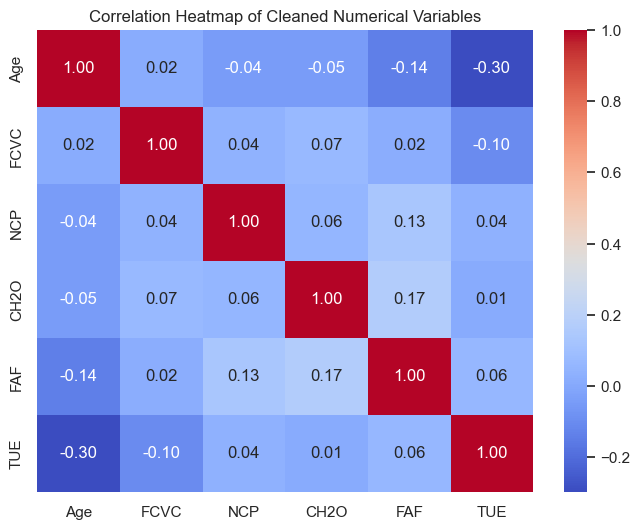

In [15]:
num_cols = ["Age","FCVC","NCP","CH2O","FAF","TUE"]
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Cleaned Numerical Variables")
plt.show()